<a href="https://colab.research.google.com/github/hnmelo/MujeresDigitales/blob/main/4)_Inferencia_Estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 1 Teoria

**Preliminares de la inferencia**

1. ¿Cuál es el objeto para el cual son válidos los enunciados generales
producto de la inducción, de la decisión o la estimación que realiza
una aplicación estadística?
2. ¿Cuáles son las unidades que permiten obtener la información de
casos particulares como punto inicial en el citado proceso?
3. ¿Cuáles son los principios que rigen este proceso tan particular de
inferencia?

**Muestra aleatoria** es una sucesion finita de variables aleatorias $X_1, X_2, \dots, X_n$ independientes e idénticamente distribuidas. n corresponde al tamaño muestral

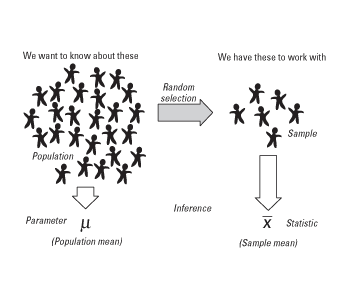



**Estimacion puntual de estimadores de parametros**

1. Metodo de Maxima verosimilitud

$$L(\theta;x_1,x_2,\dots, x_n) = \sum_{i=1}^n f_X (x_i, \theta)$$

Con f la funcion de densidad 

2. Metodo de los momentos

Sea $X_1, X_2, \dots, X_n$ una muestra aleatoria de una poblacion con funcion de densidad $f_X (x,\theta)$. Existiendo el momento $E[X^r], r=1,2,\dots$

$$\frac{1}{n}\sum_{i=1}^n (X_i -\bar{X_n})^r \xrightarrow{P} \mu_r$$

3. Metodo por analogia

4. Estimacion Bayesiana

**Estimacion por intervalo**

1.Estimacion de promedios bajo normalidad

$$\bar{X_n} -z_{\alpha/2} \frac{\sigma}{\sqrt{n}}\leq \mu \leq \bar{X_n} +z_{\alpha/2} \frac{\sigma}{\sqrt{n}}\leq$$











2.Proporcion poblacional

$$\hat{p}-z_{\alpha/2} \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}\leq p \leq \hat{p}+z_{\alpha/2}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}} $$



3.Varianza

$$\frac{(n-1)s^2}{\chi^2_{\alpha/2}}\leq \sigma^2 \leq \frac{(n-1)s^2}{\chi^2_{1-\alpha/2}}$$


**Pruebas de hipotesis**

Una **hipótesis** estadística es una aseveración o conjetura acerca de la distribución de una población, afirmación que generalmente está asociada a un subconjunto del espacio del parámetro e correspondiente al modelo probabilístico que representa la citada población. Como notación, la aseveración se enuncia después de la abreviatura Ho

El **juzgamiento de una hipótesis** estadística es un proceso que culmina con una decisión de rechazar o de no rechazar una hipótesis con
base en la información de una muestra aleatoria $X_1 ,X_2,\dots, X_n$ de una
población para la cual se ha asumido un modelo probabilístico cuya función de densidad es $f_X (x,\theta)$

La hipótesis sobre la cual se estructura el proceso de juzgamiento se denomina **hipótesis nula** se denota Ho 

La hipótesis elegida como contraste a la hipótesis nula se denomina **hipótesis alterna**, se denota H1

Se denomina **hipótesis simple** si con dicha aseveración queda plenamente especificada la distribución de la población. En caso contrario se denomina **hipótesis compuesta**.


Dentro del proceso de juzgamiento de la hipótesis Ho se denomina **error del tipo 1** a la decisión de rechazar Ho, siendo verdadera la hipótesis; asimismo, se designa como **error del tipo 2** a
la decisión de no rechazar la hipótesis nula siendo ella falsa.

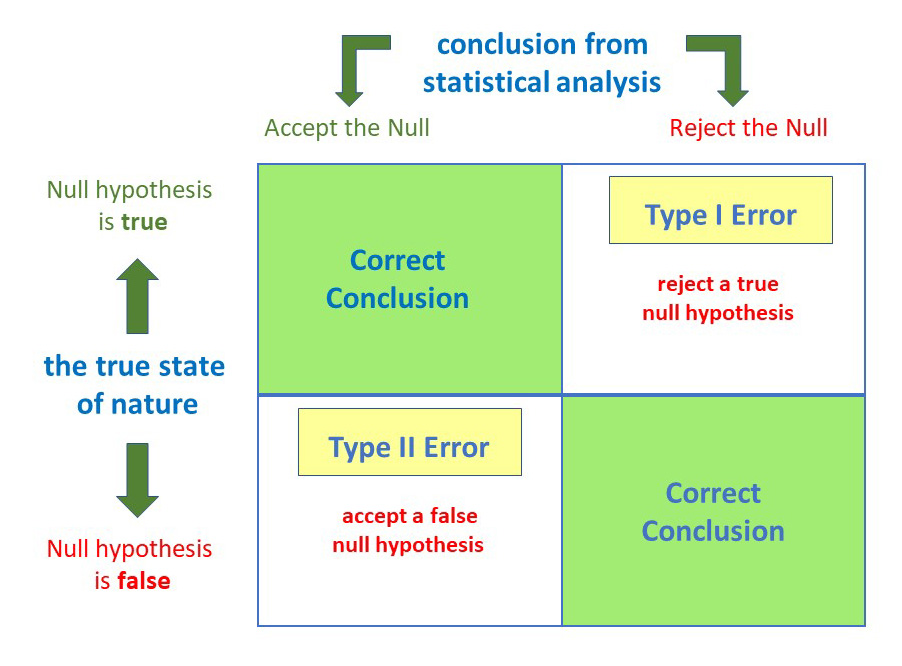







# Parte 2

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Mounted at /content/gdrive
/content


In [ ]:
%cd '/content/gdrive/MyDrive/Bootcamp SENA 2021/Semana 5/'

/content/gdrive/MyDrive/Bootcamp SENA 2021/Semana 5


# ¿Existen diferencias significativas entre los saldos de las distintas cohortes de mis clientes?

In [ ]:
pip install jupyter_contrib_nbextensions

     |████████████████████████████████| 20.9 MB 1.2 MB/s 
     |████████████████████████████████| 479 kB 47.1 MB/s 
     |████████████████████████████████| 861 kB 36.8 MB/s 
  Created wheel for jupyter-latex-envs: filename=jupyter_latex_envs-1.4.6-py2.py3-none-any.whl size=963415 sha256=433a59dad1c6d59c71f584a85bd8be7620d798eaa19f7829480d72a9cf6555e7
  Stored in directory: /root/.cache/pip/wheels/a0/95/26/4cf34fb92765c95fb7851fd447511594bcc3a50e504bd09af9
  Created wheel for jupyter-nbextensions-configurator: filename=jupyter_nbextensions_configurator-0.4.1-py2.py3-none-any.whl size=465842 sha256=150e220f03bf6ce6f15aad665e2a18f7c2e39c2b9d4eefa8322113853e6d0074
  Stored in directory: /root/.cache/pip/wheels/8d/c4/b5/e4b61f624036f83566580d61f24af7b73180b1361ee1ab3722
Successfully built jupyter-latex-envs jupyter-nbextensions-configurator


## Objetivo (3 min)

Uno de los problemas clave en la ciencia de datos es determinar si un patrón que observa es lo suficientemente significativo como para justificar acciones adicionales. En este caso, aprenderá una herramienta fundamental para abordar este problema llamada **prueba de hipótesis estadísticas**. Al final de este caso, debe saber cómo realizar una prueba de hipótesis, analizar su resultado e identificar sus deficiencias.

## Introduccion (5 min)

**Contexto empresarial.** Dirige una unidad de análisis empresarial en un banco y se le ha solicitado que apoye a la unidad de marketing para realizar un análisis de segmentación de clientes. Se le proporciona un conjunto de datos que comprende una muestra de clientes, los saldos de sus cuentas bancarias y cierta información demográfica sobre ellos. Diferentes poblaciones en todo el país tienen diferentes niveles de ingresos y pueden tener diferentes perfiles de gasto. Su equipo de marketing desea saber si existen diferencias significativas en los saldos bancarios de los diferentes subsegmentos de su base de clientes, para que puedan diseñar productos específicos para diferentes grupos.

**Problema comercial.** El departamento de marketing quiere que usted determine si: **"¿Existen diferencias estadísticamente significativas en los saldos bancarios de sus segmentos de clientes (por edad, trabajo, educación, estado civil, etc.)?"**

**Contexto analítico.** El conjunto de datos que usaremos en este caso se obtuvo de Kaggle (https://www.kaggle.com/skverma875/bank-marketing-dataset). En este caso, daremos el primer paso hacia la transición del **análisis de datos exploratorios** al **análisis confirmatorio**. Vamos a: (1) aprender un marco formal para la prueba de hipótesis; (2) aprender sobre los $p$ values; (3) generar una hipótesis a partir del análisis de datos exploratorios; y finalmente (4) analizar los resultados de una prueba de hipótesis.

In [ ]:
! pip install pingouin

     |████████████████████████████████| 206 kB 7.9 MB/s 
     |████████████████████████████████| 28.5 MB 49 kB/s 
     |████████████████████████████████| 9.5 MB 57.4 MB/s 
  Created wheel for pingouin: filename=pingouin-0.4.0-py3-none-any.whl size=206904 sha256=4d0eb9f4b54e83a90a3d2e36047bf9b6554bbd13af837042ccecd754d9c77b53
  Stored in directory: /root/.cache/pip/wheels/8a/9d/c4/11677c2c4d5c0df9d1d4aa61528d868bb96e13b898e3f51c95
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=0afcaf58ff0a7ca2640830885024a6a4f8f6bfefcceac3ad48e66c483072e626
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from scipy import stats
from pingouin import pairwise_ttests #this is for performing the pairwise tests

## Exploracion de data (15 min)

Los datos incluyen el saldo de la cuenta de 45,211 clientes, junto con varias otras características:

In [ ]:
bank = pd.read_csv("bank-full.csv")
bank.shape

(45211, 17)

In [ ]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Las características relevantes que usaremos en este caso son:

1. **balance:** saldo bancario; variable clave de interés
2. **job:** el título del trabajo ("gerencia", "técnico", etc.)
3. **marital:** estado civil ("soltero", "casado" o "divorciado")
4. **education:** diferentes niveles de educación ("primaria", "secundaria", "terciaria", "desconocida")
5. **default:** el cliente predeterminado ("sí" o "no")
6. **loan:** el cliente obtuvo un préstamo ("sí" o "no")

In [ ]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


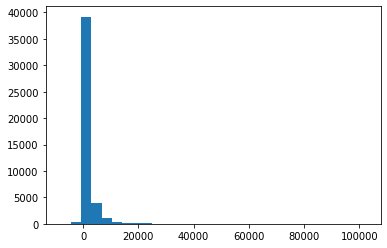

In [ ]:
plt.hist(bank['balance'],bins = 30);

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(bank, x="balance",nbins=100)
fig.show()

### Ejercicio 1: (3 min)

En las tablas y el histograma anteriores, vemos un rango enorme en el saldo bancario de sus clientes. ¿Por qué crees que es esto?

**Respuesta.** 

Muy a menudo, una amplia gama en el resultado de interés de una población indica la existencia de varios subgrupos en la población. En nuestro caso, hay personas con diversos grados de educación, perfiles laborales, etc. Esperamos que estos subgrupos tengan diferentes saldos bancarios.

Entendamos más nuestros datos trazando las variables. Considere las variables `job`,` marital`, `education`,` default`, `housing`,` loan`. Para cada una de estas variables, graficamos el número de clientes en cada categoría de la siguiente manera.

In [ ]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

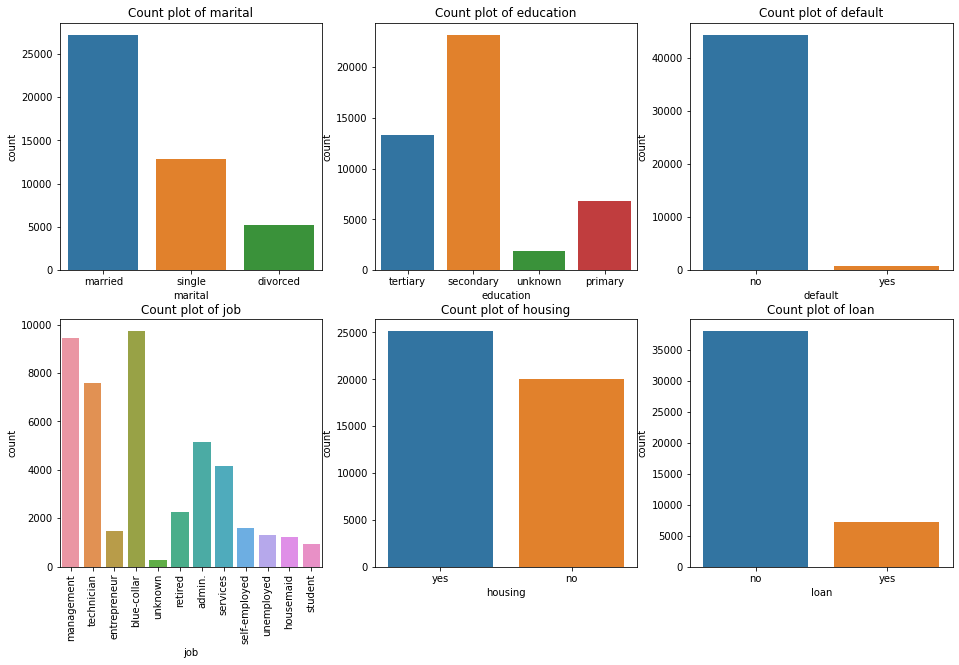

In [ ]:
plt.figure(figsize=(16,10))
vars_to_look = ['marital','education','default','job','housing','loan']
for i, var in enumerate(vars_to_look):
    plt.subplot(2,3,i+1)
    if i ==3:
        plt.xticks(rotation = 90)
    sns.countplot(bank[var])
    plt.title("Count plot of " + var)

### Ejercicio 2: (3 min)

¿Qué puedes concluir de las gráficas?

**Respuesta.** 

Confirmamos nuestra conjetura inicial: existe una variación entre las diferentes categorías, por lo que podemos sospechar que estas diferencias son clave para comprender la variación de los saldos bancarios.

### Ejercicio 3: (3 min)

El año pasado, el saldo promedio de toda la población de clientes del banco fue de \\$1341.12. ¿Cuánto más alto es el saldo promedio de la muestra este año? ¿Es esta diferencia significativa?

**Respuesta.**

In [ ]:
bank['balance'].mean()

1362.2720576850766

Esta es una diferencia de \\$1362.27 - \\$1341.12 = \\$22.15. La dirección del banco cree que el comportamiento del consumidor podría haber cambiado ligeramente y que, en promedio, los clientes mantienen más dinero en su cuenta bancaria.

Sin embargo, esta diferencia podría deberse a una variación estadística debido a la variabilidad del muestreo. Necesitaríamos realizar una prueba más rigurosa para determinar si esta diferencia es realmente significativa después de tener en cuenta dicha variabilidad.

## Marco analítico para la prueba de hipótesis (20 min)

El procedimiento que usamos para ayudarnos a decidir si una diferencia entre la media $ \mu $ de una población y un valor de referencia $\mu_0$ es **estadísticamente significativa** se llama **prueba de hipótesis**. En nuestro contexto,
$\mu$ es el saldo bancario promedio de los clientes este año y $ \mu_0$ es su saldo bancario promedio el año pasado.

El primer paso es definir la hipótesis nula (a menudo indicada como $H_0$). Para nosotros, la hipótesis nula **siempre** corresponderá a la hipótesis de no cambio; es decir, el statu quo sigue siendo válido. Formalmente, esto se escribe como: $H_0:\mu=\mu_0$.

En nuestro caso, $H_0$ sería equivalente al plantear la hipótesis de que el saldo promedio para toda la población de clientes $\mu$ es el mismo que el saldo promedio del año pasado $\mu_0 =\$1341.12$. Deseamos probar si $H_0$ es incorrecto; es decir, si $\mu$ es diferente de $\mu_0 = \$ 1341.12$.

Antes de profundizar en el caso, piense en la siguiente pregunta:

### Pregunta: (5 min)

Suponga que usted es Ronald Fisher en la década de 1920 y descubriera la prueba de hipótesis por primera vez. ¿Cómo probaría la veracidad de la hipótesis nula $H_0$?

**Respuesta:** 

Podemos usar un enfoque similar al del sistema judicial en todo el mundo: *[Uno se considera inocente hasta que se demuestre lo contrario](https://en.wikipedia.org/wiki/Presumption_of_innocence)*. Aceptaremos la hipótesis nula a menos que encontremos suficiente evidencia en su contra. Nótese que este enfoque, como es el caso del sistema judicial, no es perfecto. Incluso si no encontramos evidencia que vaya en contra de la hipótesis nula, la hipótesis nula puede resultar errónea.

### Hipótesis alternativa (3 min)

In opposition to the null hypothesis, we define an alternative hypothesis (often indicated with $H_1$ or $H_a$) to challenge the status quo. We can have three different ways to define an alternative hypothesis:


1. $H_a: \mu \neq \mu_0$ (two-sided test)

2. $H_a: \mu > \mu_0$ (one-sided test)

3. $H_a: \mu < \mu_0$ (one-sided test)

La prueba estadística nos ayudará a decidir si hay suficiente evidencia para rechazar la hipótesis nula a favor de una alternativa.

### Realización de una prueba de hipótesis (3 min)

Volviendo a nuestro caso, supongamos que deseamos realizar una prueba estadística para evaluar la hipótesis de gestión:

$$ H_0: \mu= 1341.12$$
$$ H_a: \mu \neq 1341.12$$

Hay dos resultados posibles para esta prueba: (1)Concluimos que $H_0$ es falso y decimos que **rechazamos $H_0$**. En este caso concluiremos que existe evidencia estadística para la alternativa $H_a$ y que el saldo bancario de los clientes este año es de hecho diferente de 1341,12 USD. O (2) **no rechazamos $H_0$**. En este caso, concluimos que no hay suficiente evidencia estadística para decir con certeza que $H_0$ es falso. **Observe que en el segundo caso no podemos decir que la hipótesis original sea verdadera.** (De hecho, no existe ninguna prueba que le diga que una hipótesis es verdadera. ¿Por qué cree que es así?)

Podemos usar [Student's](https://www.guinness-storehouse.com/content/pdf/archive-factsheets/general-history/wsgosset-and-students-t-test.pdf) $t$-[prueba](https://en.wikipedia.org/wiki/Student's_t-test) para realizar una prueba de hipótesis para la media de una sola población. El siguiente comando nos permite ejecutar esta prueba:

In [ ]:
stats.ttest_1samp(bank['balance'], popmean=1341.122)

Ttest_1sampResult(statistic=1.4769973489267905, pvalue=0.13968331332845219)

### Leyendo el resultado de una prueba estadística: $ p $ - valores (8 min)

Las pruebas estadísticas informan un valor de **$p$-value**.Esta es la cantidad clave que usaremos para determinar si el resultado de la prueba fue significativo. En resumen, si este valor es mayor que un cierto umbral $\alpha $, llamado nivel de significancia, rechazaríamos la hipótesis nula; entraremos en más detalles más adelante. Por ahora, establezca $ \alpha =0.05$. Podemos tener dos resultados:

1. Si esta probabilidad es menor que nuestro nivel de significancia ($p<\alpha $) rechazamos $H_0$ y afirmamos que la diferencia observada es "estadísticamente significativa".
2. Si esta probabilidad es mayor que nuestro nivel de significación ($ p>\alpha $) tenemos que retener $H_0$ y afirmamos que la diferencia observada no es estadísticamente significativa.

### Pregunta: (2 min)

¿Qué concluye del resultado? ¿Rechazamos $ H_0 $ o lo retenemos?

**Respuesta.** 

Dado que el valor $p$-value (0.13968) es mayor que $ \alpha = 0.05$, tenemos que retener la hipótesis nula.

**Nota:** Si la alternativa es unilateral, diga $ H_a: \mu>\mu_0$ o $H_a:\mu <\mu_0$. Luego, simplemente ejecute la prueba de dos lados y luego divida el valor $p$-por la mitad.

In [ ]:
T,p = stats.ttest_1samp(bank['balance'], popmean=1341.122)
p_value = p/2
p_value

0.06984165666422609

### Ejercicio 4: (3 min)

Retenemos $H_0$ del resultado anterior. ¿Estamos 100% seguros de que esta decisión es correcta? ¿Por qué o por qué no?

**Respuesta:** 

Dado que los procedimientos de prueba de hipótesis estadísticas tienen como objetivo inferir sobre un parámetro de población desconocido utilizando la información contenida en una muestra, no siempre nos llevará a la decisión correcta. Sin embargo, como aprenderá más adelante, el valor $p$-nos da una buena idea del grado de confianza que podemos tener en que nuestra conclusión es correcta. Para la mayoría de las aplicaciones, será suficiente tener al menos un 95% de confianza.

## Errores debidos a una conclusión incorrecta de una prueba de hipótesis (10 min)

Hay dos formas en que una prueba puede llevarnos a una decisión incorrecta:

1. Cuando $H_0$ es verdadero y lo rechazamos. Esto se llama **Error tipo 1**. Corresponde a obtener un **falso positivo**.
2. Cuando $H_0$ es falso y no lo rechazamos. Esto se llama **Error tipo 2**. Corresponde a tener un **falso negativo**.

<table>
<tr>
<td></td><td><b>$H_0$ is true </b></td><td><b> $H_0$ is False</b></td>
</tr>
<tr>
<td><b>Reject $H_0$</b></td><td>Type I error</td><td>Correct Decision (True Positive)</td>
</tr>
<tr>
<td><b>Fail to Reject $H_0$ </b></td><td>Correct Decision (True negative) </td><td>Type II error</td>
</tr>
</table>

En general, no podemos controlar tanto el error Tipo I como el Tipo II. Entonces, el tipo de error que controlamos depende de la situación.

### Ejercicio 5: (5 min)

Analice los siguientes dos escenarios con sus compañeros de equipo:

1. Un paciente está recibiendo una prueba de diagnóstico para averiguar si está infectado con el virus del VIH. ¿Cuál es la hipótesis nula aquí? ¿Qué es más grave aquí: cometer un error de tipo I (falso positivo) o un error de tipo II (falso negativo)? ¿Por qué?
2. Está recibiendo muchos correos electrónicos no deseados, por lo que está escribiendo un algoritmo de filtro de correo no deseado para detectar si un correo electrónico es correo no deseado o no. ¿Cuál es la hipótesis nula aquí? ¿Qué es más grave aquí: cometer un error de tipo I (falso positivo) o un error de tipo II (falso negativo)? ¿Por qué?

**Respuesta.**


1. $H_0$: la persona no tiene VIH. Cometer un error de tipo II es grave aquí, ya que esto podría conducir a una esperanza de vida muy reducida si no reciben los tratamientos adecuados que necesitan.
2. $H_0$: el correo electrónico no es spam. Cometer un error de tipo I es más serio aquí. El error de tipo I significa que concluye falsamente que un correo electrónico que no es spam es spam. Esto podría perjudicarle, ya que puede perder un correo electrónico importante de su jefe.

## Controlando el error de tipo I: nivel de significancia(15 min)

Es una práctica estándar minimizar la probabilidad de cometer un error de Tipo I. La probabilidad, generalmente denotada por $ \alpha $, es el nivel de significancia que presentamos anteriormente. Por lo general, elegimos que nuestro nivel de significancia $ \alpha$ sea $ 5\% $. Por lo tanto, si rechazamos $H_0$ con $ \alpha = 0.05$, entonces solo hay una probabilidad de $5 \%$ de que la conclusión que lleguemos sea un falso positivo. Bajar el valor $ \alpha $ (digamos a $1\%$) disminuirá la probabilidad de llegar a una conclusión falsa positiva.

Por supuesto, como discutimos antes, debido a que controlamos $ \alpha $, no podemos controlar el error Tipo II que cometemos.

### Encontrar cohortes dentro de su base de clientes (5 min)

El objetivo de su equipo es determinar si existen diferencias entre los diferentes grupos de clientes en términos de saldos bancarios. Comenzamos analizando los saldos de dos cohortes: los que solicitaron un préstamo y los que no lo hicieron:

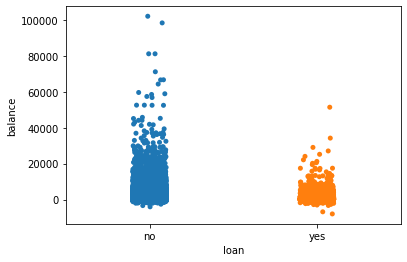

In [ ]:
ax = sns.stripplot(x="loan", y="balance", data=bank)
plt.ylabel('balance')
plt.show()

Dado que la distribución de los datos tiene colas gruesas, es difícil decir mucho del gráfico de tiras si existe una diferencia entre las medias de los dos subgrupos. Continuamos nuestro análisis de datos observando estadísticas resumidas para cada uno de los dos grupos:

In [ ]:
bank[bank.loan=="yes"].balance.describe()

count     7244.000000
mean       774.309912
std       1908.283253
min      -8019.000000
25%          2.000000
50%        258.000000
75%        864.250000
max      51439.000000
Name: balance, dtype: float64

In [ ]:
bank[bank.loan=="no"].balance.describe()

count     37967.000000
mean       1474.453631
std        3204.088951
min       -4057.000000
25%          94.000000
50%         496.000000
75%        1558.000000
max      102127.000000
Name: balance, dtype: float64

### ¿Son los medios del préstamo y los grupos no crediticios significativamente diferentes? (5 min)

Nos gustaría probar estadísticamente si las medias de los dos grupos son diferentes entre sí; es decir, si la diferencia entre el saldo medio en los grupos con un préstamo ($\mu_1 $) es diferente del saldo medio en el grupo sin préstamo ($\mu_2$). El procedimiento de prueba que describimos también se puede utilizar para responder a esta pregunta:

$$ H_0: \mu_1=\mu_2$$
$$H_a: \mu_1 \neq \mu_2$$

Obtenemos lo siguiente

In [ ]:
loans=bank[bank.loan=="yes"].balance
no_loans=bank[bank.loan=="no"].balance

statistic, pvalue = stats.ttest_ind(loans,no_loans, equal_var=False)
statistic, pvalue

(-25.18086057755715, 2.7640564777544156e-137)

### Pregunta: (2 min)

¿Qué concluiría de la prueba anterior?

**Respuesta:** 

El valor $p$ - es muy pequeño (p=2,76 e-1376); por tanto, rechazamos la hipótesis nula de que los dos grupos tienen la misma media.

### Diferencias por educación (5 min)

En nuestra búsqueda para determinar qué factores son importantes en la segmentación de clientes, podemos identificar en este gran conjunto de datos si la educación juega un papel en el comportamiento del cliente. La variable `educación` tiene 4 categorías:

In [ ]:
bank["education"].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

### Ejercicio 6: ( 3 min)

A continuación, hemos escrito un código para trazar el saldo por educación a través de un scatter plot (es decir, un diagrama de dispersión 1D agrupado). De su exploración visual, ¿cree que hay una diferencia entre los grupos?

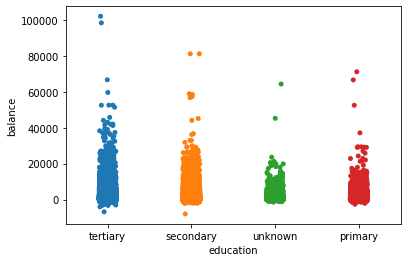

In [ ]:
ax = sns.stripplot(x="education", y="balance", data=bank)
plt.ylabel('balance')
plt.show()

**Respuesta.** 

La representación visual estándar en este caso no proporciona demasiada información; por lo tanto, necesitamos un método alternativo para investigar más a fondo.

## ¿Los saldos bancarios difieren significativamente entre las cohortes educativas? (25 min)

Nuestra nueva hipótesis sería:

$$ H_0: \mu_1=\mu_2=\mu_3=\mu_4$$
$$H_a : \mathrm{At \,least\, one\, of\, the\, means\,} \mu_j \mathrm{\,is \,different\, from\, the \,others}.$$

Para probar esta hipótesis, necesitamos una extensión de las capacidades de la prueba $t$ -(que puede probar solo dos grupos al mismo tiempo). Esta prueba se llama **Análisis de varianza (ANOVA)**.

In [ ]:
mod = ols('balance ~ education', data=bank).fit()  
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
education,3.220417e+09,3.0,116.682074,2.849538e-75
Residual,4.159034e+11,45207.0,NaN,NaN


Como podemos ver, al observar el valor de $p$ que acompaña a las estadísticas de $F$, obtenemos un fuerte rechazo de la hipótesis nula, lo que nos lleva a concluir que los grupos educativos tienen algunas diferencias en sus medias. La prueba ANOVA no nos dice qué par de grupos tienen medias que son diferentes entre sí. Para investigar más estas diferencias, primero reportaremos las estadísticas descriptivas por grupo y luego mostraremos las medias del grupo en un gráfico de barras:

In [ ]:
bank[bank.education=="primary"].balance.describe()

count     6851.000000
mean      1250.949934
std       2690.743991
min      -2604.000000
25%         61.000000
50%        403.000000
75%       1390.000000
max      71188.000000
Name: balance, dtype: float64

In [ ]:
bank[bank.education=="secondary"].balance.describe()

count    23202.000000
mean      1154.880786
std       2558.256739
min      -8019.000000
25%         55.000000
50%        392.000000
75%       1234.000000
max      81204.000000
Name: balance, dtype: float64

In [ ]:
bank[bank.education=="tertiary"].balance.describe()

count     13301.000000
mean       1758.416435
std        3839.088305
min       -6847.000000
25%         104.000000
50%         577.000000
75%        1804.000000
max      102127.000000
Name: balance, dtype: float64

In [ ]:
bank[bank.education=="unknown"].balance.describe()

count     1857.000000
mean      1526.754443
std       3152.228273
min      -1445.000000
25%        106.000000
50%        568.000000
75%       1699.000000
max      64343.000000
Name: balance, dtype: float64

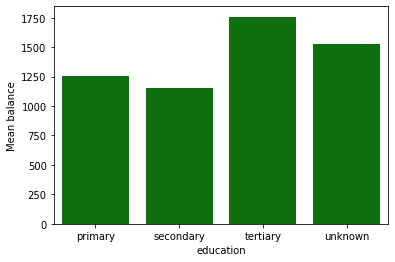

In [ ]:
mean_balance_education=bank.groupby(by="education").balance.mean()
sns.barplot(x=mean_balance_education.index, y=mean_balance_education.values, color="green")
plt.ylabel("Mean balance")
plt.show()

Cualitativamente parece haber una gran diferencia entre los niveles de educación terciaria y inferior, pero la diferencia entre los grupos de educación primaria y secundaria es más difícil de evaluar. Queremos probar si hay una diferencia significativa en cada comparación por pares. Para probar esta secuencia de hipótesis, podemos usar una variante de la prueba $t$, llamada **pairwise $t$ - test**.

In [ ]:
gb = bank.groupby(['education'])
group_names = bank["education"].unique()
group_names

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
gb = bank.groupby(['education'])
group_names = bank["education"].unique()
print("\t\t\tstatistic\t\tpvalue")
for i in range(len(group_names)):
  for j in range(i+1, len(group_names)):
    group1 = gb[["balance"]].get_group(group_names[i])
    group2 = gb[["balance"]].get_group(group_names[j])
    stat, pvalue = stats.ttest_ind(group1, group2, equal_var = False)
    print(group_names[i] + " vs. " + group_names[j] + "\t" + str(stat[0]) + "\t" + str(pvalue[0]))

			statistic		pvalue
tertiary vs. secondary	16.18717929985782	1.4525474790099814e-58
tertiary vs. unknown	2.8825321831203117	0.003976238237673688
tertiary vs. primary	10.906634331433306	1.3023845080432282e-27
secondary vs. unknown	-4.95482328681934	7.83111710943088e-07
secondary vs. primary	-2.6255174227477864	0.0086639693661419
unknown vs. primary	3.445496944400963	0.0005789323657180873


El resultado de resumen anterior indica que hay una diferencia significativa entre cada comparación por pares.

### Ejercicio 7: (4 min)
Hay seis comparaciones en total que deben realizarse porque la variable educación tiene 4 niveles. Discuta con un compañero si, en su opinión, realizar múltiples pruebas simultáneamente puede aumentar el riesgo de inferencias erróneas.
¿Qué aumentará: error de tipo I o error de tipo II?

**Respuesta.** 

Sí, cuantas más comparaciones realizamos simultáneamente, mayor es el riesgo de observar algunos "falsos positivos" o cometer un error de tipo I. Básicamente, si torturas los datos lo suficiente, confesará.

### Comparaciones múltiples: la corrección de Bonferroni (15 min)

Hay muchas formas de corregir este problema, conocido como problema de "comparaciones múltiples". Uno de los métodos más clásicos es la corrección de Bonferroni. Este método divide el nivel de significancia $\alpha$ por el número de comparaciones múltiples que se realizan (6 en este caso). Entonces, si nuestro $ \alpha = 0.05 $ rechazaremos la hipótesis nula solo si el valor de $p$ es menor que 0.00833.

Observe que el valor $p$  para la comparación entre la educación "primaria" y "secundaria" es 0.02126 y, por lo tanto, es más alto que el nivel de confianza ajustado. Después de la corrección, no podemos rechazar la hipótesis nula de que este par tiene medias significativamente diferentes. Varios paquetes de software ajustan directamente los valores de $p$ para aumentar la probabilidad de observar un falso positivo. Si realizamos este método para `educación`, obtenemos el siguiente resultado:

In [ ]:
pairwise_results = pairwise_ttests(dv='balance', between = ['education'], padjust='bonf', data=bank)
pairwise_results

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,education,primary,secondary,False,True,2.625517,10768.241876,two-sided,8.663969e-03,5.198382e-02,bonf,0.486,0.037105
1,education,primary,tertiary,False,True,-10.906634,18353.418018,two-sided,1.302385e-27,7.814307e-27,bonf,9.088e+23,-0.145344
2,education,primary,unknown,False,True,-3.445497,2633.681528,two-sided,5.789324e-04,3.473594e-03,bonf,10.941,-0.098651
3,education,secondary,tertiary,False,True,-16.187179,20183.403282,two-sided,1.452547e-58,8.715285e-58,bonf,5.742e+54,-0.195497
4,education,secondary,unknown,False,True,-4.954823,2056.380989,two-sided,7.831117e-07,4.698670e-06,bonf,5633.685,-0.142646
5,education,tertiary,unknown,False,True,2.882532,2688.204879,two-sided,3.976238e-03,2.385743e-02,bonf,1.76,0.061581


En la tabla anterior, ``p-unc`` representa el valor $p$ no corregido y ``p-adjust`` representa el valor $p$ corregido. El valor ajustado de $p$ para "secundario vs. primario" es 0.052 (mayor que 0.05), lo que confirma nuestro cálculo. Por lo tanto, rechazamos todas las hipótesis nulas excepto el caso "secundaria versus primaria".

### Ejercicio 8: (10 min)

Realice un análisis de datos exploratorio del saldo bancario por cargo. Escriba código para responder las siguientes dos preguntas:

1. ¿El grupo significa lo mismo? Escribe una hipótesis para esto, indicando claramente qué es $H_0$.
2. Realizar una prueba de hipótesis por pares para comparar las diferentes medias de los grupos, aplicando la corrección de Bonferroni.
3. ¿Le sorprende alguno de los resultados de las pruebas de hipótesis de los clientes en la dirección frente a otros grupos?

**Respuesta.** 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



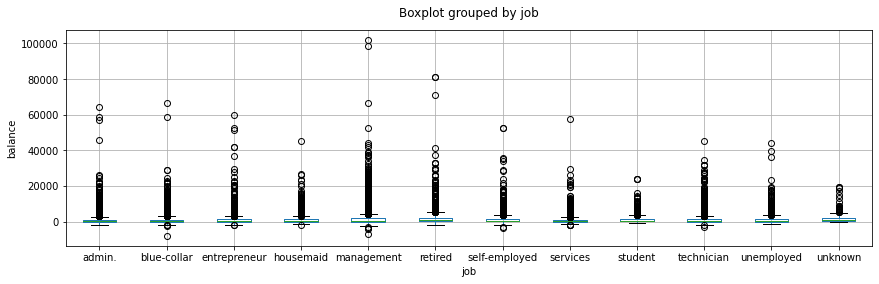

In [ ]:
boxplot = bank.boxplot(column=['balance'], by="job",figsize=(14,4))
boxplot.axes.set_title("")
plt.ylabel('balance')
plt.show()

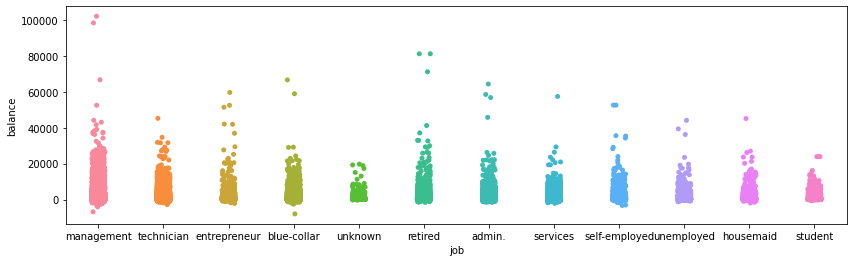

In [ ]:
plt.figure(figsize=(14,4))
ax = sns.stripplot(x="job", y="balance", data=bank)
plt.ylabel('balance')
plt.show()

In [ ]:
mod = ols('balance ~ job', data=bank).fit()  
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
job,4.341414e+09,11.0,43.007783,5.709430e-94
Residual,4.147824e+11,45199.0,NaN,NaN


In [ ]:
pairwise_job_results = pairwise_ttests(dv='balance', between = ['job'], padjust='bonf', data=bank)
pairwise_job_results[pairwise_job_results['A']=='management']

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
38,job,management,retired,False,True,-2.196665,3131.535808,two-sided,2.811739e-02,1.000000e+00,bonf,0.293,-0.055981
39,job,management,self-employed,False,True,1.148353,2184.520136,two-sided,2.509488e-01,1.000000e+00,bonf,0.059,0.030404
40,job,management,services,False,True,14.825903,12787.547265,two-sided,2.556646e-49,1.687386e-47,bonf,4.105e+45,0.225194
41,job,management,student,False,True,4.225002,1439.557060,two-sided,2.539487e-05,1.676061e-03,bonf,276.437,0.100961
42,job,management,technician,False,True,10.429971,16520.443985,two-sided,2.169693e-25,1.431997e-23,bonf,5.845e+21,0.154074
43,job,management,unemployed,False,True,2.530687,1875.469495,two-sided,1.146511e-02,7.566972e-01,bonf,0.809,0.064539
44,job,management,unknown,False,True,-0.048726,316.659804,two-sided,9.611682e-01,1.000000e+00,bonf,0.067,-0.002300


El saldo de la cuenta de clientes desempleados y clientes administrativos no es significativamente diferente, ¡y esto es sorprendente!

## Conclusiones (3 min)

Después de realizar un análisis de datos exploratorio, introdujimos formalmente las pruebas de hipótesis. Vimos que el nivel educativo definitivamente afecta el saldo bancario; los clientes con educación terciaria parecen tener una diferencia estadísticamente significativa en el saldo bancario en comparación con el resto de la población. Sin embargo, después de ajustar por múltiples pruebas, no parece haber una diferencia estadísticamente significativa entre los clientes con educación primaria y secundaria. También vimos bastantes diferencias estadísticamente significativas en los saldos bancarios de clientes con diferentes perfiles laborales.